This notebook visualises the total number of night rider trips from the city

It is based on the data provided by Transport for NSW
- Night rider data is cleaned in this [notebook](1_OD_Cleaning.ipynb)
- map boundary data is sourced from the [open government portal](https://data.gov.au/dataset?tags=Boundaries)

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 12)

import seaborn as sns
#sns.set(font_scale=0.6)

import geopandas as gp
from shapely.geometry import box

# Visualisation by Local Government Area

In [2]:
df = pd.read_pickle('ODPairData/df_clean.pkl')

In the following analysis, we will only include trips from these stations

In [3]:
include = ['Central Station', 'Town Hall Station', 'Town Hall House', 
           'Circular Quay', 'Martin Place Station', 
           'Newtown Station',  'Kings Cross Station']

Prepare the LGA mapping data

In [4]:
gdf_LGA = gp.read_file('geodata/NSW_LGA.shp')[['nsw_lga__3', 'geometry']]
gdf_LGA = gdf_LGA.rename(columns={'nsw_lga__3':'LGA'}).query('LGA != "UNINCORPORATED"')

Then total all night rider data and create a geodataframe for plotting

In [8]:
df_totals=df.query('From in @include').groupby(['LGA_to']).Totaltrips.agg(sum).to_frame().reset_index().dropna()
df_totals.LGA_to = df_totals.LGA_to.apply(str.upper)
df_map = gp.GeoDataFrame(df_totals.merge(gdf_LGA, left_on='LGA_to', right_on='LGA'), crs=gdf_LGA.crs)

In this map the trips are broken into 7 bins of equal range

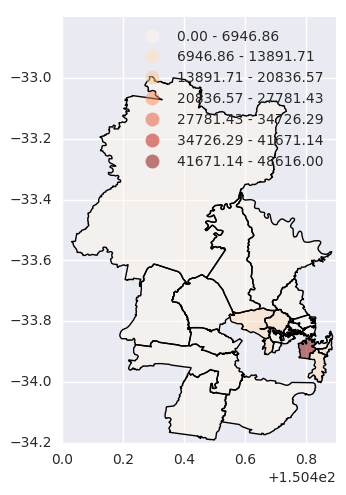

In [13]:
df_map.query("LGA not in ['NEWCASTLE', 'BOGAN', 'WOLLONGONG']").plot(column='Totaltrips', scheme='Equal_Interval', k=7, cmap='OrRd', legend=True, label='LGA');

To create more contrast the bins are broken into 5 quantiles

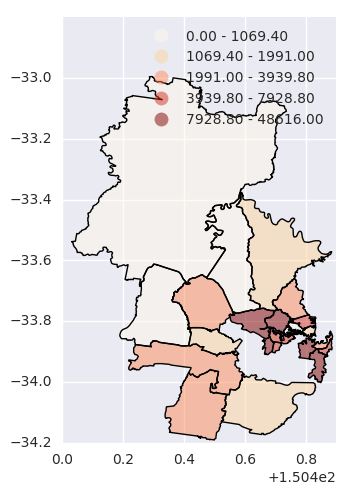

In [12]:
df_map.query("LGA not in ['NEWCASTLE', 'BOGAN', 'WOLLONGONG']").plot(column='Totaltrips', scheme='QUANTILES', k=5, cmap='OrRd', legend=True, label='LGA');

In [14]:
df_totals.sort_values(by='Totaltrips', ascending=False).head(20)

,LGA_to,Totaltrips
34,SYDNEY,48616.0
30,ROCKDALE,12795.0
22,MARRICKVILLE,12359.0
29,RANDWICK,11374.0
9,CANTERBURY,11021.0
26,PARRAMATTA,9645.0
10,CITY OF KOGARAH,9230.0
31,RYDE,8335.0
32,STRATHFIELD,8088.0
37,WAVERLEY,7690.0


## Suburb 

In [18]:
gdf_Suburb = gp.read_file('geodata/NSW_Suburb.shp')[['nsw_loca_2', 'geometry']]

In [19]:
gdf_Suburb = gdf_Suburb.rename(columns={'nsw_loca_2':'Suburb_to'})

In [22]:
df_totals=df.query('From in @include').groupby(['Suburb_to']).Totaltrips.agg(sum).to_frame().reset_index().dropna()
df_totals.Suburb_to = df_totals.Suburb_to.apply(str.upper)

df_map = gp.GeoDataFrame(df_totals.merge(gdf_Suburb, on='Suburb_to'), crs=gdf_Suburb.crs)

In this map the trips are broken into 7 bins of equal range

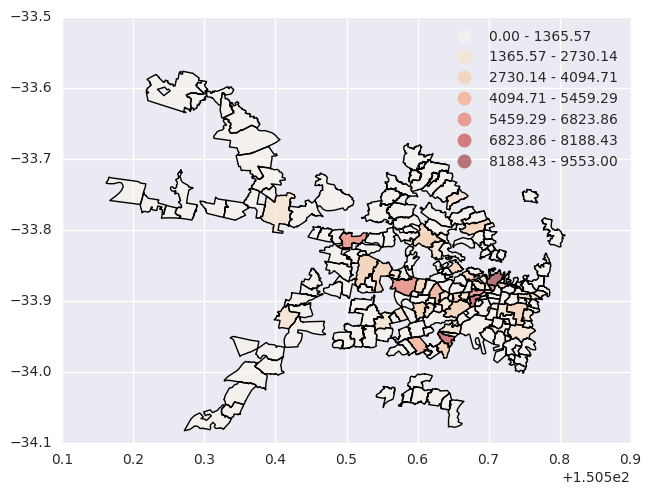

In [23]:
df_map[df_map.within(box(150, -34.5, 152, -33))].plot(column='Totaltrips', scheme='Equal_Interval', k=7, cmap='OrRd', legend=True)

To create more contrast the bins are broken into 7 quantiles

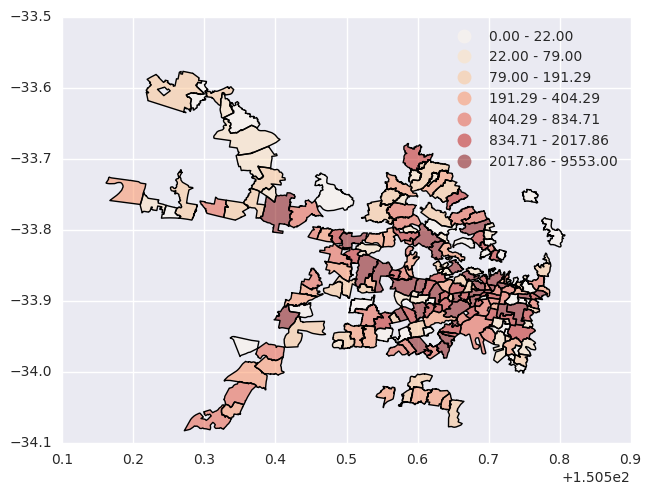

In [24]:
df_map[df_map.within(box(150, -34.5, 152, -33))].plot(column='Totaltrips', scheme='QUANTILES', k=7, cmap='OrRd', legend=True)

In [25]:
df_totals.sort_values(by='Totaltrips', ascending=False).head(20)

,Suburb_to,Totaltrips
249,SYDNEY,9553.0
121,HAYMARKET,7835.0
221,ROCKDALE,7725.0
181,NEWTOWN,7230.0
244,STRATHFIELD,6340.0
40,CAMPERDOWN,6225.0
196,PARRAMATTA,5556.0
8,ASHFIELD,4835.0
130,HURSTVILLE,4164.0
9,AUBURN,4049.0


# Origin Destination Heat Map

In [26]:
from math import log1p

In [27]:
df = pd.read_pickle('ODPairData/df_clean.pkl')

In [28]:
LGA_from_to =(df.query('Night == "Friday"').
                 groupby(['From', 'LGA_to'], as_index=False).agg({"Totaltrips":sum}).
                 pivot_table(index='LGA_to', columns='From', aggfunc=sum, margins=True).
                 sort_values([('Totaltrips', 'All')], ascending=False).
                 sort_values(['All'], ascending=False, axis='columns'))
LGA_from_to

Totaltrips                                    \
From                    All Town Hall Station Central Station   
LGA_to                                                          
All                 72694.0           29986.0         16374.0   
Sydney              17111.0            4051.0          6080.0   
Waverley             6125.0               NaN            75.0   
Randwick             4146.0               NaN           670.0   
Marrickville         4085.0            1547.0          1694.0   
Parramatta           3986.0            2063.0           585.0   
Rockdale             3607.0            2535.0           772.0   
Ryde                 3153.0            1421.0           307.0   
Canterbury           3108.0            1875.0           844.0   
Strathfield          2587.0            1698.0           592.0   
City of Kogarah      2487.0            1827.0           539.0   
Auburn               2407.0            1684.0           448.0   
Canada Bay           2141.0             883.0           443.0   
Ashfield             2063.0            1290.0           691.0   
Willoughby           1984.0            1704.0            30.0   
Leichhardt           1557.0             391.0           432.0   
Burwood              1412.0             927.0           455.0   
Blacktown            1339.0             889.0           263.0   
Woollahra            1138.0             226.0            30.0   
Ku-Ring-Gai          1103.0            1056.0             NaN   
Liverpool             781.0             447.0           206.0   
North Sydney          747.0             438.0             4.0   
Holroyd               747.0             326.0            79.0   
Campbelltown          659.0             493.0           130.0   
Fairfield             619.0             356.0           100.0   
Bankstown             569.0             409.0           121.0   
Hornsby               555.0             470.0            59.0   
Botany Bay            469.0               NaN           357.0   
Sutherland Shire      425.0             297.0           105.0   
Hunters Hill          343.0             127.0            22.0   
Wollongong            296.0             213.0            63.0   
Hurstville            276.0             186.0            68.0   
Penrith               153.0              94.0            31.0   
The Hills Shire       153.0              32.0            11.0   
Bogan                 127.0               NaN            47.0   
Lane Cove              93.0               NaN             NaN   
Hawkesbury             53.0              31.0            20.0   
Manly                  40.0               NaN             NaN   
Mosman                 29.0               NaN             NaN   
Warringah              19.0               NaN             1.0   
Newcastle               1.0               NaN             NaN   
Pittwater               1.0               NaN             NaN   

                                                                            \
From             Martin Place Station Circular Quay Bondi Junction Station   
LGA_to                                                                       
All                            6315.0        5952.0                 4581.0   
Sydney                         2159.0        2122.0                  830.0   
Waverley                       1342.0        1370.0                 3198.0   
Randwick                       1850.0        1574.0                   49.0   
Marrickville                    228.0           3.0                    NaN   
Parramatta                       18.0          81.0                    NaN   
Rockdale                          NaN           6.0                   10.0   
Ryde                             86.0         273.0                    NaN   
Canterbury                       19.0           NaN                    NaN   
Strathfield                       NaN           NaN                    NaN   
City of Kogarah                   3.0           6.0                    NaN   

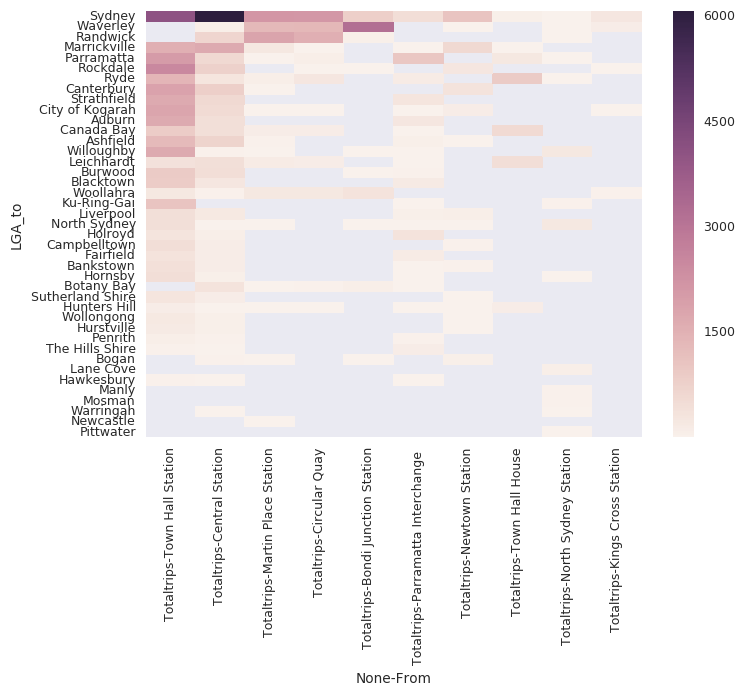

In [29]:
sns.set(font_scale=0.9)
sns.heatmap(LGA_from_to.drop(('Totaltrips', 'All'),  axis="columns").drop("All", axis="rows"))              

Redo the chart taking the log of the sum of the trips to reduce the dynamic range

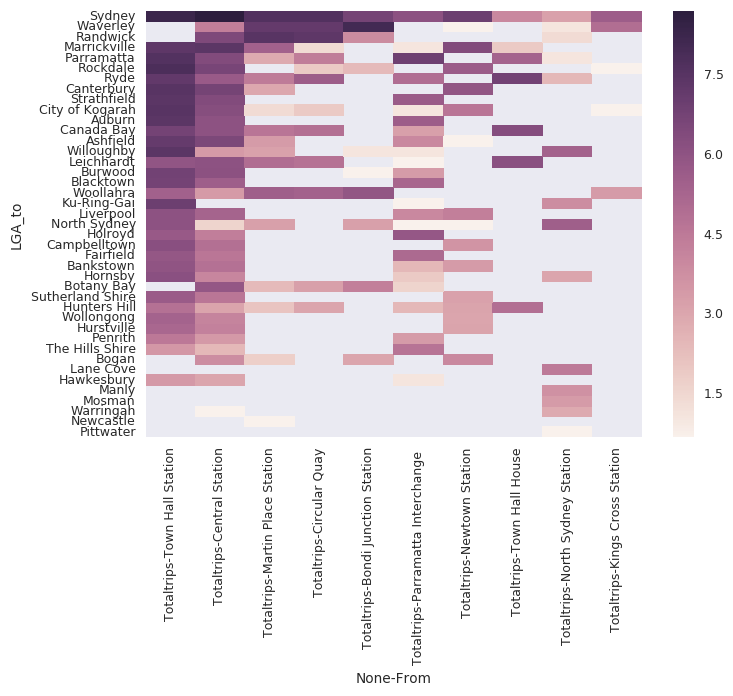

In [30]:

LGA_from_to =(df.query('Night == "Friday"').
                 groupby(['From', 'LGA_to'], as_index=False).agg({"Totaltrips":sum}).
                 pivot_table(index='LGA_to', columns='From', aggfunc=lambda x: log1p(sum(x)), margins=True).
                 sort_values([('Totaltrips', 'All')], ascending=False).
                 sort_values(['All'], ascending=False, axis='columns'))
sns.heatmap(LGA_from_to.drop(('Totaltrips', 'All'),  axis="columns").drop("All", axis="rows"))              

# Distance traveled

In creating this we found that some Destinations had not been correctly looked up in the Google geo-code. We removed the obvious mistakes, however it does bring into questions the accuracy of this approach. While these errors are probably small, if we wanted to publish this work we would need to fix this. The only solution is to get the suburb, LGA and Lat/long from Transport.



In [31]:
df = pd.read_pickle('ODPairData/df_clean.pkl')

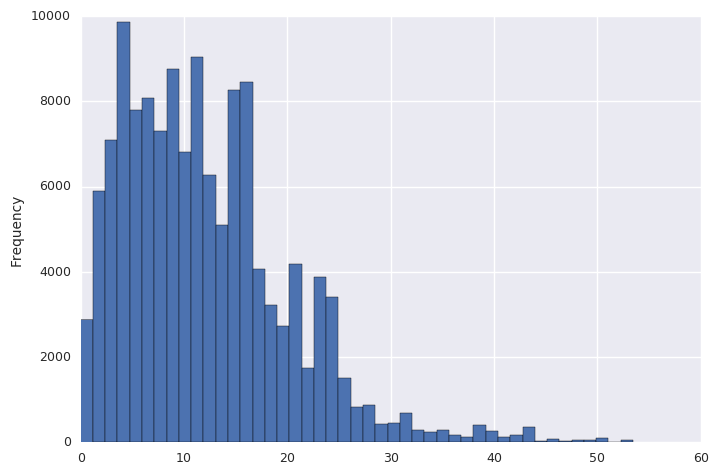

In [32]:
df.query('LGA_to not in ["Bogan",  "Newcastle", "Wollongong"]').Distance.plot.hist(bins=45)

In [33]:
df.query('LGA_to not in ["Bogan",  "Newcastle", "Wollongong"]').Distance.describe()

count    132509.000000
mean         12.146904
std           8.075651
min           0.000000
25%           5.809324
50%          10.950750
75%          16.385146
max          53.451355
Name: Distance, dtype: float64